In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard

In [2]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [4]:
from tensorflow.keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/400
469/469 [==============================] - 35s 75ms/step - loss: 0.6925 - val_loss: 0.6917
Epoch 2/400
469/469 [==============================] - 36s 77ms/step - loss: 0.6906 - val_loss: 0.6894
Epoch 3/400
469/469 [==============================] - 36s 77ms/step - loss: 0.6879 - val_loss: 0.6862
Epoch 4/400
469/469 [==============================] - 36s 77ms/step - loss: 0.6836 - val_loss: 0.6804
Epoch 5/400
469/469 [==============================] - 37s 78ms/step - loss: 0.6747 - val_loss: 0.6671
Epoch 6/400
469/469 [==============================] - 37s 78ms/step - loss: 0.6510 - val_loss: 0.6279
Epoch 7/400
469/469 [==============================] - 36s 78ms/step - loss: 0.5758 - val_loss: 0.5117
Epoch 8/400
469/469 [==============================] - 36s 78ms/step - loss: 0.4729 - val_loss: 0.4588
Epoch 9/400
469/469 [==============================] - 37s 79ms/step - loss: 0.4464 - val_loss: 0.4409
Epoch 10/400
469/469 [==============================] - 38s 81ms/step - l

In [5]:
from matplotlib import colors, cm, pyplot as plt

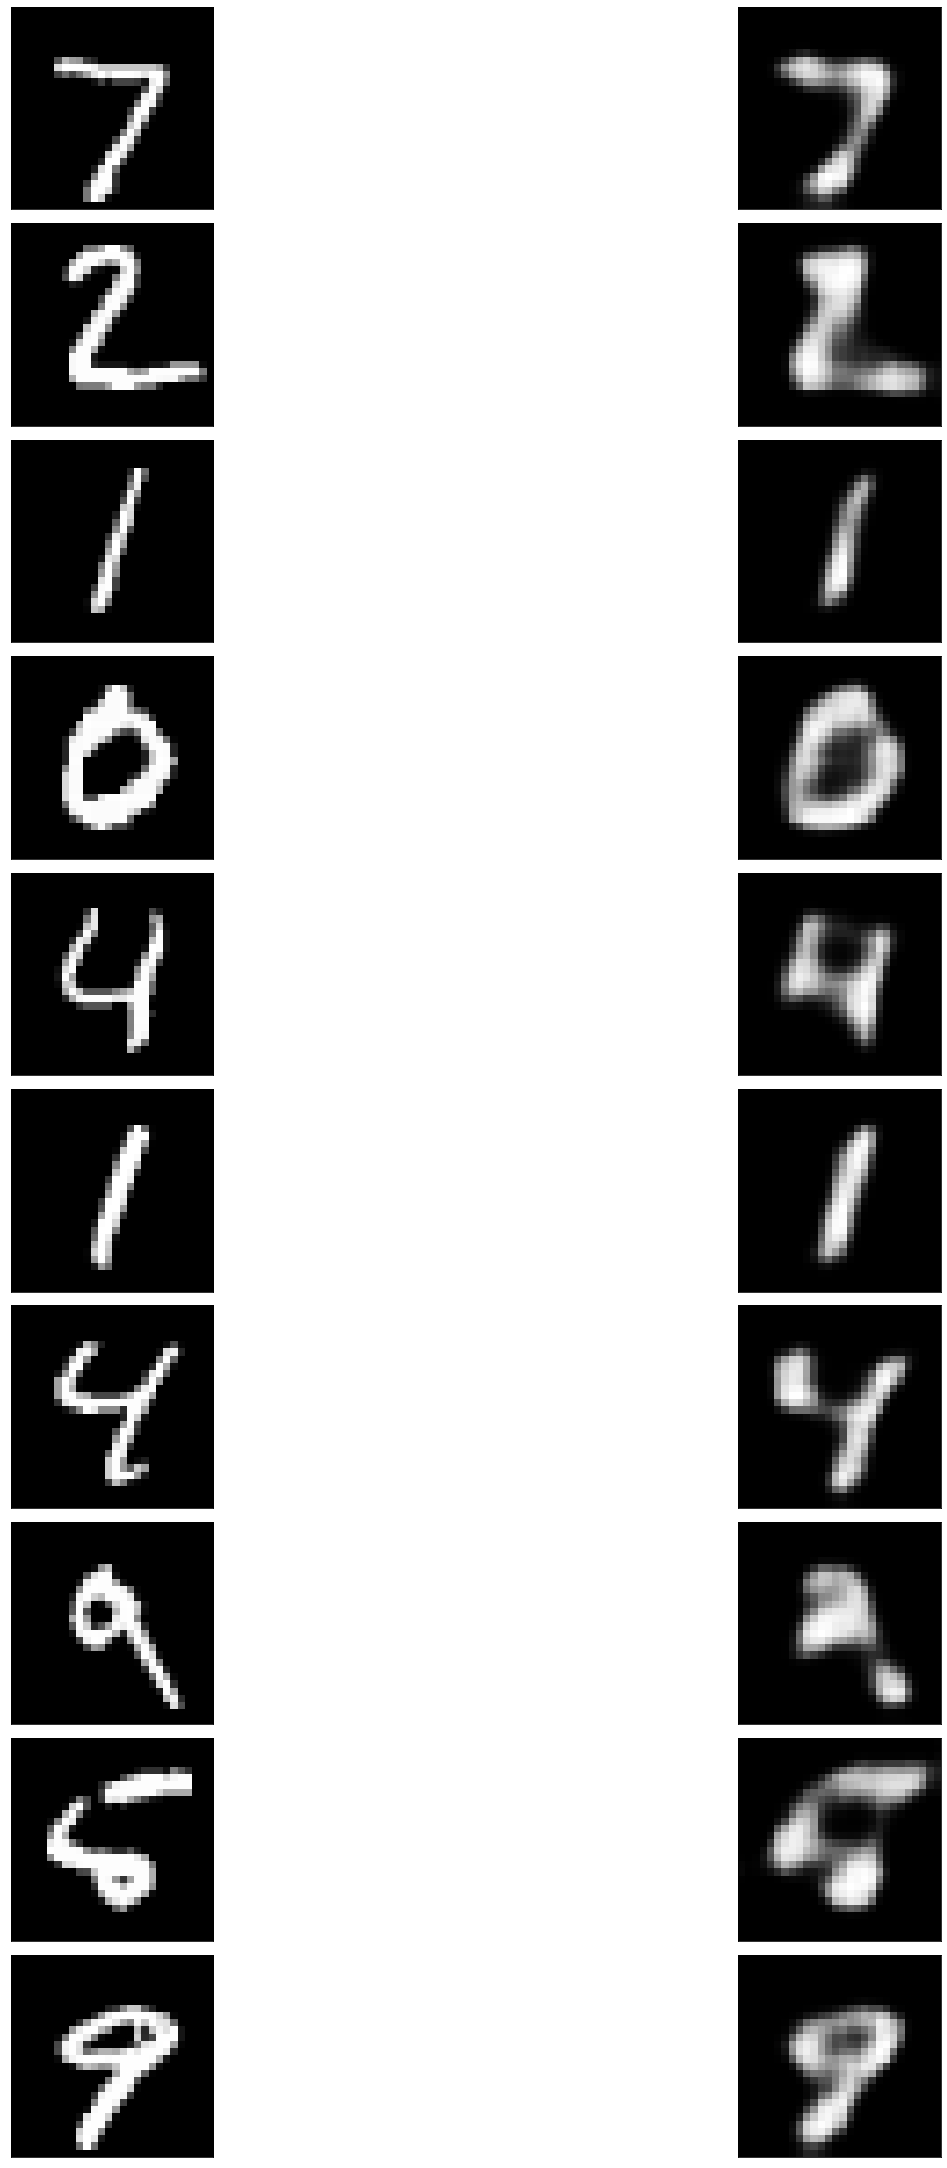

In [12]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # the number of images to display
columns = 2
rows = n

f, axarr = plt.subplots(nrows=rows, ncols=columns, constrained_layout=True)
f.set_figheight(30)
f.set_figwidth(20)

for i in range(n):
    # display original
    ax = axarr[i,0]  # row, column
    ax.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = axarr[i,1]  # row, column
    ax.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()